In [54]:
# 배운것을 토대로 펭귄을 분류해보자!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

penguins = pd.read_csv('/content/sample_data/penguins.csv')

penguins.head(15)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [55]:
penguins.dropna(inplace = True) # 결측치 있는 행과 열을 제거
penguins[penguins.isnull().any(axis=1)]


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [56]:
penguins.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,174.324324,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,98.386547,5.468668,1.969235,14.015765,805.215802,0.812944
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,90.000000,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,173.000000,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,259.000000,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [57]:
print(np.unique(penguins.species))  # 종 이름 확인
print(np.unique(penguins.island)) # 서식지 이름 확인

['Adelie' 'Chinstrap' 'Gentoo']
['Biscoe' 'Dream' 'Torgersen']


In [58]:
pg = penguins.replace({'male':0, 'female':1})
pg = pg.replace({'Adelie':1, 'Chinstrap':2, 'Gentoo':3}) # 추후 인공신경망 모델을 위해 정수로 변환
pg = pg.replace({'Biscoe':1, 'Dream':2,'Torgersen':3})
# 오브젝트 타입의 데이터들 형 변환
pg = pg.astype('float')
print(pg.describe())

       Unnamed: 0     species      island  bill_length_mm  bill_depth_mm  \
count  333.000000  333.000000  333.000000      333.000000     333.000000   
mean   174.324324    1.918919    1.651652       43.992793      17.164865   
std     98.386547    0.889718    0.714715        5.468668       1.969235   
min      1.000000    1.000000    1.000000       32.100000      13.100000   
25%     90.000000    1.000000    1.000000       39.500000      15.600000   
50%    173.000000    2.000000    2.000000       44.500000      17.300000   
75%    259.000000    3.000000    2.000000       48.600000      18.700000   
max    344.000000    3.000000    3.000000       59.600000      21.500000   

       flipper_length_mm  body_mass_g         sex         year  
count         333.000000   333.000000  333.000000   333.000000  
mean          200.966967  4207.057057    0.495495  2008.042042  
std            14.015765   805.215802    0.500732     0.812944  
min           172.000000  2700.000000    0.000000  2007

In [59]:
target = pg['species'].to_numpy()
data = pg[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].to_numpy()
# 데이터셋에서 년도를 제거한 것을 특성으로 사용


train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_input)
train_scaled = sc.transform(train_input)
test_scaled = sc.transform(test_input)
# 데이터 정규화

In [60]:
# 최적의 하이퍼파라미터 찾기
# from sklearn.model_selection import GridSearchCV
# params = { 'n_estimators' : range(10, 100, 10),
#            'max_depth' : range(6, 12, 1),
#            'min_samples_leaf' : range(8, 20, 2),
#            'min_samples_split' : range(8, 20, 2)
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행 
# # 다음의 출처를 참고한 코드 : https://injo.tistory.com/30
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(train_scaled, train_target)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score= True ,n_jobs=-1, random_state = 42) # 랜덤포레스트 객체
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42) # 분배기
scores = cross_validate(rf, train_scaled, train_target, return_train_score=True, cv=splitter, n_jobs=-1) # 교차검증
rf.fit(train_scaled, train_target)
rf_trainset = rf.oob_score_
print(rf_trainset) # 훈련 세트를 사용한 점수
rf_validationset = np.mean(scores['test_score'])
print(rf_validationset) # 교차검증을 이용하여 검증세트를 사용한 점수
rf.fit(test_scaled, test_target)
rf_testset = rf.oob_score_
print(rf_testset) # 테스트 세트를 사용한 점수

0.9887218045112782
0.9924528301886791
0.9701492537313433


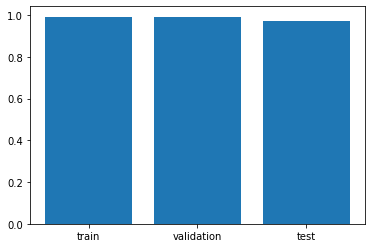

In [62]:
x = np.arange(3)
sets = ['train', 'validation', 'test']
score = [rf_trainset, rf_validationset, rf_testset]

plt.bar(x, score)
plt.xticks(x, sets)

plt.show() # 랜덤 포레스트 모델의 학습, 검증, 평가 막대 그래프

In [63]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.model_selection import GridSearchCV # 그리드서치
logistic_params = {
    'max_iter' : range(100, 1000, 100),
    'C' : range(1, 20, 2)
}
lr = LogisticRegression() # 선형회귀 모델 객체
gs = GridSearchCV(lr, logistic_params, cv = splitter, n_jobs=-1)

gs.fit(train_scaled, train_target)

dt = gs.best_estimator_

print(dt.score(train_scaled, train_target))
print(gs.best_params_) # 최적의 하이퍼 파라미터 찾기

0.9924812030075187
{'C': 1, 'max_iter': 100}


In [64]:
lr = LogisticRegression(C=1, max_iter=100) # 찾아낸 하이퍼 파라미터로 모델 재 선언

lr.fit(train_scaled, train_target)
lr_trainset = lr.score(train_scaled, train_target)
print(lr_trainset) # 로지스틱 회귀 모델 훈련세트 점수
scores = cross_validate(lr, train_scaled, train_target, return_train_score=True, cv=splitter, n_jobs=-1) # 선형회귀모델 교차검증
lr_validationset = np.mean(scores['test_score']) 
print(lr_validationset) # 로지스틱 회귀 모델 검증세트 점수
print(lr_validationset) # 로지스틱 회귀 모델 평가세트 점수
lr.fit(test_scaled, test_target)
lr_testset = lr.score(test_scaled, test_target)

0.9924812030075187
0.9924528301886791
0.9924528301886791


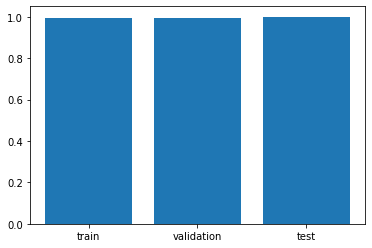

In [65]:
score = [lr_trainset, lr_validationset, lr_testset]

plt.bar(x, score)
plt.xticks(x, sets)

plt.show() # 로지스틱 회귀 모델의 학습, 검증, 평가 막대 그래프

In [66]:
import tensorflow as tf
from tensorflow import keras
# 인공 신경망에서는 검증세트를 별도로 덜어내서 사용하기

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)




In [82]:
from sklearn.linear_model import SGDClassifier

print(train_scaled.shape)
print(train_target.shape)
dense = keras.layers.Dense(4, activation='softmax', input_shape=(6,)) # 뉴런은 4개, 입력될 펭귄들은 각각 6개의 특성들을 보유 중
model = keras.Sequential(dense) # 모델 생성
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics='accuracy') # 다중분류이므로 크로스 엔트로피 손실함수를 사용함

(212, 6)
(212,)


In [85]:
print(train_target[:10]) 
model.fit(train_scaled, train_target, epochs=20) # 모델 훈련

[1. 3. 2. 1. 3. 3. 1. 3. 3. 2.]
Epoch 1/20
7/7 [==============================] - 0s 2ms/step - loss: 1.0520 - accuracy: 0.5283
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 1.0084 - accuracy: 0.5566
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.9680 - accuracy: 0.5755
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.9312 - accuracy: 0.6132
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8965 - accuracy: 0.6415
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.6651
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.8346 - accuracy: 0.6745
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.6840
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7811 - accuracy: 0.6934
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.7028
Epoch 1

In [88]:
dl_trainset = model.evaluate(train_scaled, train_target) # 인공 신경망 훈련세트 점수
dl_validationset = model.evaluate(val_scaled, val_target) # 인공 신경망 검증세트 점수
dl_testset = model.evaluate(test_scaled, test_target) # 인공 신경망 평가세트 점수

print(dl_trainset[1], dl_validationset[1], dl_testset[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.7313
0.7877358198165894 0.8703703880310059 0.7313432693481445


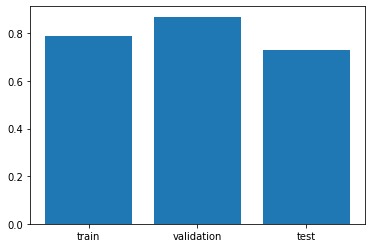

In [89]:
score = [dl_trainset[1], dl_validationset[1], dl_testset[1]]

plt.bar(x, score)
plt.xticks(x, sets)

plt.show() # 인공신경망 모델의 학습, 검증, 평가 막대 그래프

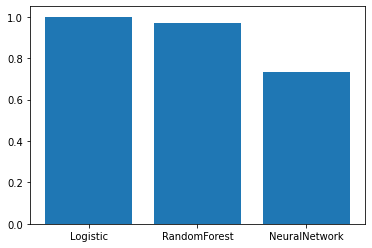

In [91]:
sets = ['Logistic', 'RandomForest', 'NeuralNetwork']
score = [lr_testset, rf_testset, dl_testset[1]]

plt.bar(x, score)
plt.xticks(x, sets)

plt.show() # 세개의 모델의 평가결과 비교